In [1]:
import pandas as pd
import os
import re
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import time
import random
import pickle
from functools import reduce

from scipy.stats import linregress

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Import and Merge Datasets
---

In [2]:
Total_DF=pd.read_pickle("../Data/VideoDF.pkl")

In [3]:
Total_DF

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360212,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
360213,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,,US
360214,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,I had so much fun transforming Safiyas hair in...,US
360215,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,How Black Panther Should Have EndedWatch More ...,US


In [4]:
#read addtional video info dataset
API_DF=pd.read_pickle("../Data/API_RETRIEVED_DATA.pkl")

In [5]:
#merge
API_DF.reset_index(inplace=True)
API_DF.rename(columns = {"index" :"video_id"}, inplace=True)
Total_API_DF = pd.merge(Total_DF, API_DF, on="video_id", how="left")

In [6]:
Total_API_DF.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,country,ChannelID,ChannelTitle,DefaultLanguage,DefaultAudioLanguage,Duration,Caption,RegionRestriction_Blocked,RegionRestriction_Allowed
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,Eminem's new track Walk on Water ft. Beyoncé i...,CA,UC20vb-R_px4CguHzzBPhoyQ,EminemVEVO,None,en-US,PT5M5S,false,None,"[MZ, EC, MX, MY, PE, EG, PG, EE, MR, MS, EH, M..."
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,STill got a lot of packages. Probably will las...,CA,UC4USoIAL9qcsx5nCZV_QRnA,iDubbbzTV,None,None,PT9M35S,false,None,None
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,UC5jkXpfnBhlDjqh0ir5FsIQ,Rudy Mancuso,en,en,PT9M29S,true,None,None
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,I know it's been a while since we did this sho...,CA,UCSAUGyc_xA8uYzaIVG6MESQ,nigahiga,en,en,PT12M13S,true,None,None
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,None,None,PT4M40S,false,None,None


In [7]:
#read channel dataset
channel_df = pd.read_pickle("../Data/Channel_API_RETRIEVED_DATA.pkl")

In [8]:
#merge
channel_df.rename(columns={"country" : "Country Origin"}, inplace=True)
#Total_API_DF.reset_index(inplace=True)
ultimate_df= pd.merge(Total_API_DF, channel_df, on="ChannelID", how="left")

In [9]:
ultimate_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,RegionRestriction_Allowed,Channel_Title,Channel_Description,Channel_PublishedAt,Country Origin,defaultLanguage,keywords,GoogleAnalytics,moderateComments,topicCategories
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,"[MZ, EC, MX, MY, PE, EG, PG, EE, MR, MS, EH, M...",EminemVEVO,"Eminem on Vevo - Official Music Videos, Live P...",2009-05-12T05:27:52Z,None,en,vevo music video official,True,False,Hip_hop_music | Rock_music | Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,None,iDubbbzTV,"YO YO YO YO YO YO YO YO YOOOOOOOOOOOOOOOOOO, W...",2012-08-18T04:11:12Z,US,None,idubbbz idubbz kickstarter crap bad unboxing c...,False,False,Entertainment | Lifestyle_(sociology)
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,None,Rudy Mancuso,NEW VIDEOS EVERY WEEK! Make sure you SUBSCRIBE...,2011-09-30T23:14:41Z,US,None,"""lele pons"" ""rudy mancuso"" ""anwar jibawi"" ""del...",False,True,Entertainment | Music
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,None,nigahiga,"Send me stuff here!\nPO BOX 232355 Las Vegas, ...",2006-07-21T01:40:43Z,US,None,nigahiga ryan higa higatv,False,False,Entertainment | Film
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,None,Ed Sheeran,The official YouTube channel for Ed Sheeran.,2006-08-08T13:59:50Z,None,None,"edsheeran ""ed sheeran"" acoustic live cover off...",False,False,Pop_music | Hip_hop_music | Music


Analysis: 
===

How do trending videos compare regarding number countries trended in and number of days videos trended?

Data manipulation
===

In [10]:
#calculate no. of countries each video trended in

#create dataframe limited to unique dates per id/country
no_countries_DF = Total_DF.drop_duplicates(subset=['video_id', 'country'], keep='first')

#create a dataframe with findings
no_of_countries_df= pd.DataFrame({"No of Countries Trended In" : no_countries_DF.groupby('video_id')['country'].count()})

#calculate the sum of days trended per video across countries

    # calculate days each video trended per country
Trending_Days = Total_DF.groupby(['video_id', 
                                  'country']).aggregate(Days_trending=('trending_date',
                                                                  'count'))
    #unstack to gain access
unstacked_Trending_Days = Trending_Days.unstack()
unstacked_Trending_Days.fillna(value=0, inplace=True)
final_Trending_Days = pd.DataFrame(unstacked_Trending_Days.to_records()) 

    #sum across countries to total days trendings 
sum_of_days_trended = final_Trending_Days.sum(axis=1)

     #create a dataframe with findings
sum_of_days_df = pd.DataFrame({"video_id" : final_Trending_Days["video_id"],
                               "Sum of Days trended" : sum_of_days_trended})

sum_of_days_df.set_index("video_id", inplace=True)

#merge datasets

combined_per_video_df = pd.merge(sum_of_days_df, no_of_countries_df, on="video_id")

combined_per_video_df["Mean Days Trending"] = combined_per_video_df["Sum of Days trended"]/combined_per_video_df["No of Countries Trended In"]

In [11]:
#create a segment column for number of countries trended in  
combined_per_video_df["Country Segment"] = combined_per_video_df["No of Countries Trended In"]

combined_per_video_df["Country Segment"] = np.where(combined_per_video_df["No of Countries Trended In"]==1, 
                                            "Trended in 1 country", 
                                            combined_per_video_df["Country Segment"])

combined_per_video_df["Country Segment"] = np.where((combined_per_video_df["No of Countries Trended In"]>1) & (combined_per_video_df["No of Countries Trended In"]<=5), "Trended in 2 to 5 countries", combined_per_video_df["Country Segment"])

combined_per_video_df["Country Segment"] = np.where(combined_per_video_df["No of Countries Trended In"]>5 , "Trended in more than 5 countries", combined_per_video_df["Country Segment"])


In [18]:
#create a segment column for number of days a video trended 
combined_per_video_df["Days Trended Segment"] = combined_per_video_df["Mean Days Trending"]

combined_per_video_df["Days Trended Segment"] = np.where(combined_per_video_df["Mean Days Trending"]==1, 
                                                        "Trended for 1 day", 
                                                        combined_per_video_df["Days Trended Segment"])

combined_per_video_df["Days Trended Segment"] = np.where((combined_per_video_df["Mean Days Trending"]>1) & 
                                                         (combined_per_video_df["Mean Days Trending"]<=5), 
                                                         "Trended for 2 to 5 days", 
                                                         combined_per_video_df["Days Trended Segment"])

combined_per_video_df["Days Trended Segment"] = np.where(combined_per_video_df["Mean Days Trending"]>5 ,
                                                         "Trended more than 5 days", 
                                                         combined_per_video_df["Days Trended Segment"])


In [19]:
#verify dataframe 
combined_per_video_df.head()

,Sum of Days trended,No of Countries Trended In,Mean Days Trending,Country Segment,Days Trended Segment
video_id,,,,,
--1skHapGUc,1.0,1,1.0,Trended in 1 country,Trended for 1 day
--2K8l6BWfw,1.0,1,1.0,Trended in 1 country,Trended for 1 day
--45ws7CEN0,3.0,3,1.0,Trended in 2 to 5 countries,Trended for 1 day
--6vcer7XYQ,3.0,1,3.0,Trended in 1 country,Trended for 2 to 5 days
--728h8mnDY,2.0,1,2.0,Trended in 1 country,Trended for 2 to 5 days


In [20]:
#countries trended vs days trended: create table

    #groupby to get counts
count_by_country_no_trended = combined_per_video_df.groupby(["Country Segment", 
                                                     "Days Trended Segment"]
                                                    )["No of Countries Trended In"].count().unstack()

count_by_country_no_trended["Total"] = count_by_country_no_trended.sum(axis=1)

count_by_country_no_trended

Days Trended Segment,Trended for 1 day,Trended for 2 to 5 days,Trended more than 5 days,Total
Country Segment,,,,
Trended in 1 country,122344,45348,2765,170457
Trended in 2 to 5 countries,4580,7216,1438,13234
Trended in more than 5 countries,28,334,153,515


In [35]:
    #create dataframe containing percentages
country_trended_percentage_df = pd.DataFrame({
    "Single Day(%)": count_by_country_no_trended[
        "Trended for 1 day"]*100/count_by_country_no_trended["Total"],
    "Two to Five Days(%)": count_by_country_no_trended[
        "Trended for 2 to 5 days"]*100/count_by_country_no_trended["Total"],
    "More than five Days(%)": count_by_country_no_trended[
        "Trended more than 5 days"]*100/count_by_country_no_trended["Total"]})

country_trended_percentage_df.fillna(value=0, inplace=True)

country_trended_percentage_df

,Single Day(%),Two to Five Days(%),More than five Days(%)
Country Segment,,,
Trended in 1 country,71.774113,26.603777,1.622110
Trended in 2 to 5 countries,34.607828,54.526220,10.865951
Trended in more than 5 countries,5.436893,64.854369,29.708738


In [22]:
#per country counts per days trended segment: create table
    
    #reset index to allow count by country
Trending_Days_by_country = Trending_Days.reset_index(level=1)

    #split dataframe and count by country

single_days = Trending_Days_by_country.loc[
    Trending_Days_by_country["Days_trending"]==1, :]

country_trending_1_single_days = single_days.groupby("country").count()

two_to_five_days = Trending_Days_by_country.loc[
    (Trending_Days_by_country["Days_trending"]>1) &
    (Trending_Days_by_country["Days_trending"]<=5), :]

country_trending_2_to_5_days = two_to_five_days.groupby("country").count()

more_than_five_days = Trending_Days_by_country.loc[
    Trending_Days_by_country["Days_trending"]>5, :]

country_trending_more_than_5_days = more_than_five_days.groupby(
                                                    "country").count()

In [24]:
    #merge

dataframes=[country_trending_1_single_days, 
            country_trending_2_to_5_days, 
            country_trending_more_than_5_days]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='left'), dataframes)

df_merged.set_axis(["Single Day", 
                    "Two to Five Days", 
                     "More than Five Days"], axis=1, inplace=True)

df_merged["Total"] = df_merged.sum(axis=1)

In [25]:
 #create dataframe containing percentages
country_percentage_df = pd.DataFrame({"Single Day(%)": df_merged[
                                        "Single Day"]*100/df_merged["Total"],
                  "Two to Five Days(%)": df_merged[
                      "Two to Five Days"]*100/df_merged["Total"],
                  "More than Five Days(%)": df_merged[
                      "More than Five Days"]*100/df_merged["Total"]})

country_percentage_df.fillna(value=0, inplace=True)

country_percentage_df

,Single Day(%),Two to Five Days(%),More than Five Days(%)
country,,,
CA,59.432107,39.986069,0.581824
DE,72.258805,27.734441,0.006754
FR,75.198796,24.797932,0.003272
GB,7.011635,17.636252,75.352113
IN,47.994111,50.625690,1.380199
JP,88.605534,11.394466,0.000000
KR,39.098076,60.372122,0.529801
MX,83.700585,16.299415,0.000000
RU,84.489903,15.510097,0.000000


In [34]:
#create dataframe with only videos trending in multiple countries

    #bring country segmentation into originally dataframe
Transition = Total_DF 

Transition["Countries Trended in Segment"] = combined_per_video_df["Country Segment"]

   #create dataframe containing only those videos that trended in 
multinational_df = Transition.loc[Transition["Countries Trended in Segment"]!= "Trended in 1 country",:]

#find first day to trend per each country
First_trend = multinational_df.groupby(
    ['video_id',"country"]).aggregate(
    First_Trend_Date=('trending_date', 'min'))
   
    #collapse into lists, determine unique first days
First_trend.reset_index(level=1, inplace=True)
col_First_trend = First_trend.groupby(
    "video_id").aggregate(
    lambda tdf: tdf.unique().tolist())
col_First_trend['No. of Unique First Days Trended'] = col_First_trend["First_Trend_Date"].apply(lambda x: len(x))
col_First_trend['No. of Countries Trended In'] = col_First_trend["country"].apply(lambda x: len(x))
col_First_trend

,country,First_Trend_Date,No. of Unique First Days Trended,No. of Countries Trended In
video_id,,,,
--1skHapGUc,[MX],[1518220800000000000],1,1
--2K8l6BWfw,[FR],[1520294400000000000],1,1
--45ws7CEN0,"[CA, MX, RU]",[1528761600000000000],1,3
--6vcer7XYQ,[MX],[1521763200000000000],1,1
--728h8mnDY,[FR],[1512518400000000000],1,1
...,...,...,...,...
zzuI1sona1M,[RU],[1515888000000000000],1,1
zzvWC_pDiIk,[RU],[1514937600000000000],1,1
zzxLG6R5cHI,[MX],[1517529600000000000],1,1


In [20]:
#create dataset allowing comparison between Days trended(as opposed to me) 
    #by no. of countries trended in 
DaysTrended_vs_Countries = Trending_Days.reset_index(level=1)

DaysTrended_vs_Countries["No. countries trended in"] = col_First_trend['No. of Countries Trended In']

DaysTrended_vs_Countries

,country,Days_trending,No. countries trended in
video_id,,,
--1skHapGUc,MX,1,1
--2K8l6BWfw,FR,1,1
--45ws7CEN0,CA,1,3
--45ws7CEN0,MX,1,3
--45ws7CEN0,RU,1,3
...,...,...,...
zzuI1sona1M,RU,1,1
zzvWC_pDiIk,RU,1,1
zzxLG6R5cHI,MX,1,1


Findings: 
---

<Figure size 432x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x21fe4624430>,
 [Text(0.8905197077689269, -0.6457357432225238, ''),
  Text(-0.840135503584379, 0.7100509387480747, ''),
  Text(-1.0587347527895676, -0.2984639395900505, '')],
 [Text(0.4857380224194146, -0.35221949630319477, '68.9%'),
  Text(-0.4582557292278431, 0.3873005120444043, '28.7%'),
  Text(-0.5774916833397641, -0.16279851250366392, '2.4%')])

Text(0.5, 1.0, 'Mean No. of Days Video Trended')

(-1.1111372686570784,
 1.113003090169773,
 -1.116509844294945,
 1.1054406927197986)

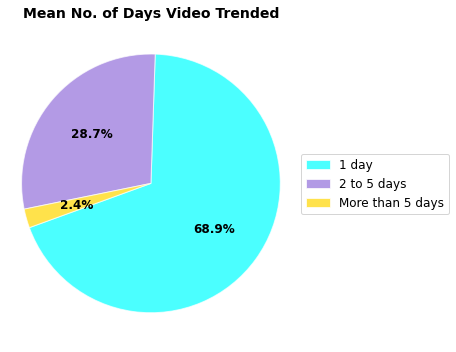

In [31]:
#display the findings for segmentation: mean number of days video trended

plt.figure(figsize=(6,5))

# Labels for the sections of our pie chart
labels = ["1 day", "2 to 5 days", "More than 5 days"]

# The values of each section of the pie chart
sizes = combined_per_video_df["Days Trended Segment"].value_counts()

# The colors of each section of the pie chart
#colors = [plt.cm.Blues(0.4), plt.cm.Purples(0.4), plt.cm.Greens(0.4)]
colors = ["cyan",  "mediumpurple", "gold"]

#Display
plt.pie(sizes,  
        colors=colors, autopct="%1.1f%%", shadow=False, 
        startangle=200, wedgeprops={'edgecolor':'w', "alpha" : 0.7}, 
        textprops={"fontsize": 12, "color":'black', "fontweight":'bold'})

#formatting
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title("Mean No. of Days Video Trended", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.axis("equal")

plt.show()

Approach: Remove duplicates so that dataset contains 1 row per video_id per country, and count the no. days video trended per country. Determine the mean no. of days: sum(days video trended per country)/no. of countries trended in.  

Insight: Over two-thirds of videos trended for a single day. Only 3.5% trended for more than 4 days. 

<Figure size 432x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x21fe1a56fa0>,
 [Text(1.0698972443899415, -0.25557755466161364, ''),
  Text(-1.0676112173206522, 0.2649646932161249, ''),
  Text(-1.0999575709186096, 0.009661375618009877, '')],
 [Text(0.5835803151217862, -0.1394059389063347, '92.5%'),
  Text(-0.5823333912658102, 0.14452619629970448, '7.2%'),
  Text(-0.599976856864696, 0.005269841246187206, '0.3%')])

Text(0.5, 1.0, 'No. of Countries Video Trended In')

(-1.100365848410614,
 1.1076828147383677,
 -1.1077773886260784,
 1.1017826821714476)

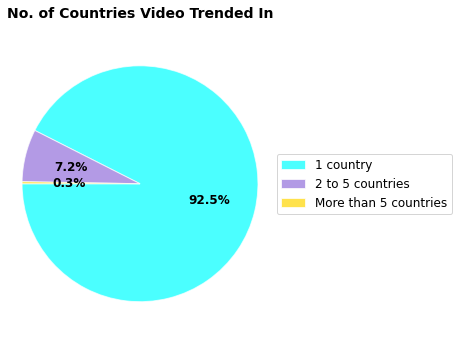

In [36]:
#display the findings for segmentation: number of countries trended in 

plt.figure(figsize=(6,5))

# Labels for the sections of our pie chart
labels = ["1 country", "2 to 5 countries", "More than 5 countries"]

# The values of each section of the pie chart
sizes = combined_per_video_df["Country Segment"].value_counts()

# The colors of each section of the pie chart
#colors = [plt.cm.Blues(0.4), plt.cm.Purples(0.4), plt.cm.Greens(0.4)]
colors = ["cyan",  "mediumpurple", "gold"]

#Display
plt.pie(sizes,  
        colors=colors, autopct="%1.1f%%", shadow=False, 
        startangle=180, wedgeprops={'edgecolor':'w', "alpha" : 0.7}, 
        textprops={"fontsize": 12, "color":'black', "fontweight":'bold'})

#formatting
plt.title("No. of Countries Video Trended In", fontsize=14, fontweight='bold')
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.axis("equal")

plt.show()

Approach: Remove duplicates so that dataset contains 1 row per video_id per country, and count the no. of rows per video_id. 

Insight: The vast majority (92.5%) of videos trended in a single country.

In [37]:
#Table: Mean Days Trending by No. of countries trended in 
country_trended_percentage_df

,Single Day(%),Two to Five Days(%),More than five Days(%)
Country Segment,,,
Trended in 1 country,71.774113,26.603777,1.622110
Trended in 2 to 5 countries,34.607828,54.526220,10.865951
Trended in more than 5 countries,5.436893,64.854369,29.708738


Approach: Create segments based on the above categories and incorporate into dataframe (df: Remove duplicates so that dataset contains 1 row per video_id per country). Group by video_id and Days_trending segment and count by countries_trended_in segment. Determine percentage of total per countries_trended_in segment. 

[Text(0, 0, '1 Country\n (N=170,457)'),
 Text(0, 0, '2-5 Countries\n (N=13,234)'),
 Text(0, 0, 'More than 5 Countries\n (N=515)')]

[]

[]

Text(0.5, 0, 'No. of Countries Trended In')

Text(0, 0.5, 'Percentage of Videos')

Text(0.5, 1.0, 'Mean Days Videos Trended by No. of Countries Trended In')

Text(0.0, 35.88705655971887, '71')

Text(1.0, 17.303914160495694, '34')

Text(2.0, 2.7184466019417477, '5')

Text(0.0, 85.07600157224402, '26')

Text(1.0, 61.87093849176364, '54')

Text(2.0, 37.864077669902905, '64')

Text(0.0, 99.18894501252515, '1')

Text(1.0, 94.56702433126794, '10')

Text(2.0, 85.14563106796118, '29')

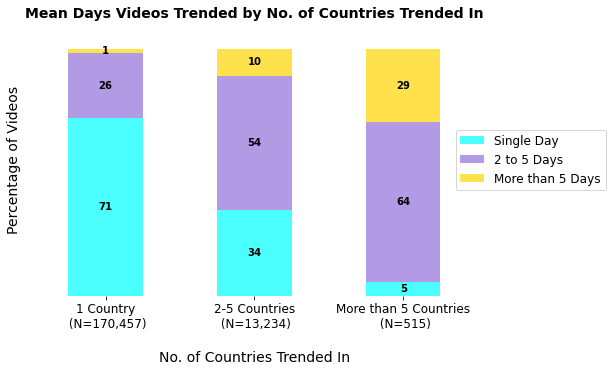

In [39]:
#create stacked bar chart - by countries segment

colors=["cyan",  "mediumpurple", "gold" ]
labels=[f"1 Country\n (N=170,457)", 
        "2-5 Countries\n (N=13,234)", 
        "More than 5 Countries\n (N=515)"]
legend_labels=["Single Day", "2 to 5 Days", "More than 5 Days"]
                                   
ax = country_trended_percentage_df.plot(kind="bar", 
                                   stacked=True, 
                                   color=colors,
                                        alpha=0.7,
                                   figsize=(8,5),
                                   fontsize=12,
                                   rot=0,
                                   ylim=(0,110))

#Formatting                                  
ax.set_frame_on(False)  

                                     
ax.set_xticklabels(labels)
                         
ax.set_yticklabels([])
ax.set_yticks([])

ax.set_xlabel("No. of Countries Trended In", 
              fontsize=14, 
              labelpad=20)

ax.set_ylabel("Percentage of Videos", 
              fontsize=14, 
              labelpad=10)

ax.set_title("Mean Days Videos Trended by No. of Countries Trended In", 
             fontsize=14,
             fontweight='bold')

plt.legend(legend_labels, 
           loc="center right", 
           bbox_to_anchor=(1.3, 0.5),
           fontsize=12)

#data labels
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    padding = 0.25
    label_text = int(height)
    
    label_x = x + width - padding
    label_y = y + height / 2
    
    ax.text(label_x, label_y, label_text, 
            ha='center', va='center',
           fontweight = "bold")
    
ax.patches

plt.show()

Approach: Plot table (Mean Days Trending by No. of countries trended in) 

Insight: The more countries videos trended in, the greater the proportion that trend for more than a single day. 

In [40]:
#Table: Days Trending by Country

country_percentage_df.sort_values(by="Single Day(%)", ascending=False, inplace=True)

country_percentage_df

,Single Day(%),Two to Five Days(%),More than Five Days(%)
country,,,
JP,88.605534,11.394466,0.000000
RU,84.489903,15.510097,0.000000
MX,83.700585,16.299415,0.000000
FR,75.198796,24.797932,0.003272
DE,72.258805,27.734441,0.006754
CA,59.432107,39.986069,0.581824
IN,47.994111,50.625690,1.380199
KR,39.098076,60.372122,0.529801
US,11.140876,37.015443,51.843681


Approach: Count no. of days a video trended by country. Count no. of videos per days_trending segment per country. Determine percentage of total per country.  

[Text(0, 0, 'Japan\n (N=12,901)'),
 Text(0, 0, 'Russia\n (N=34,268)'),
 Text(0, 0, 'Mexico\n (N=33,492)'),
 Text(0, 0, 'France\n (N=30,559)'),
 Text(0, 0, 'Germany\n (N=29,613)'),
 Text(0, 0, 'Canada\n (N=24,406)'),
 Text(0, 0, 'India\n (N=16,302)'),
 Text(0, 0, 'Korea\n (N=15,855)'),
 Text(0, 0, 'United States\n (N=6,346)'),
 Text(0, 0, 'United Kingdom\n (N=3,266)')]

[]

Text(0, 0.5, 'Country')

Text(0.5, 0, 'Percentage of Videos')

Text(0.5, 1.0, 'Days Videos Trended by Country')

Text(44.30276722734672, 0.0, '88')

Text(42.244951558305125, 1.0, '84')

Text(41.85029260718978, 2.0, '83')

Text(37.59939788605648, 3.0, '75')

Text(36.12940262722453, 4.0, '72')

Text(29.716053429484553, 5.0, '59')

Text(23.997055576002943, 6.0, '47')

Text(19.54903815830968, 7.0, '39')

Text(5.570438071225969, 8.0, '11')

Text(3.505817513778322, 9.0, '7')

Text(94.30276722734672, 0.0, '11')

Text(92.24495155830513, 1.0, '15')

Text(91.85029260718977, 2.0, '16')

Text(87.59776170686213, 3.0, '24')

Text(86.12602573194205, 4.0, '27')

Text(79.4251413586823, 5.0, '39')

Text(73.30695620169304, 6.0, '50')

Text(69.28413749605804, 7.0, '60')

Text(29.648597541758583, 8.0, '37')

Text(15.82976117575015, 9.0, '17')

Text(0.0, 0.0, '')

Text(0.0, 1.0, '')

Text(0.0, 2.0, '')

Text(99.99836382080565, 3.0, '')

Text(99.99662310471751, 4.0, '')

Text(99.70908792919774, 5.0, '')

Text(99.30990062569009, 6.0, '1')

Text(99.73509933774835, 7.0, '')

Text(74.07815947053263, 8.0, '51')

Text(62.323943661971825, 9.0, '75')

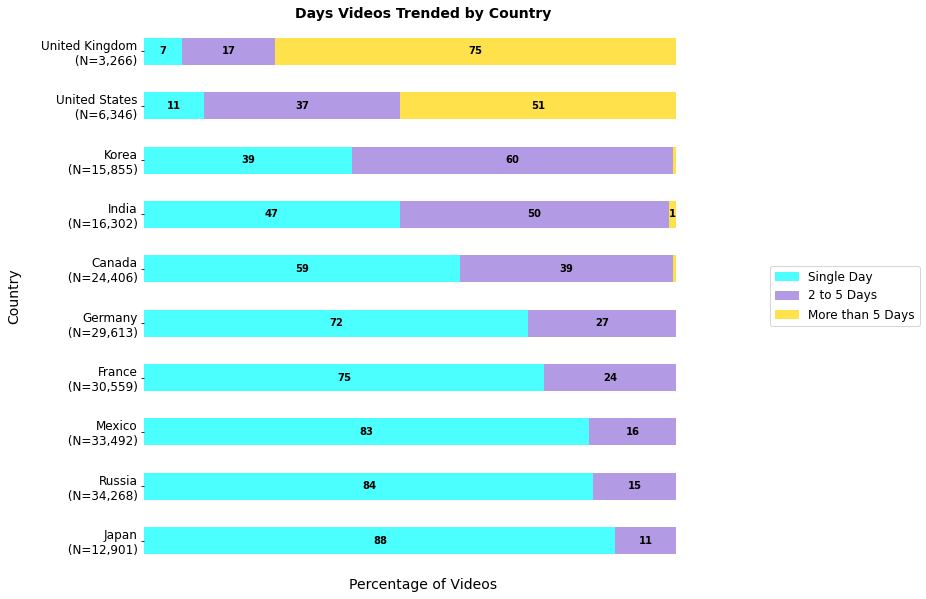

In [41]:
#create stacked bar chart - by individual countries

colors1=["cyan",  "mediumpurple", "gold" ]
labels1=["Japan\n (N=12,901)",
        "Russia\n (N=34,268)",
        "Mexico\n (N=33,492)",
        "France\n (N=30,559)",
        "Germany\n (N=29,613)",
        "Canada\n (N=24,406)", 
        "India\n (N=16,302)",
        "Korea\n (N=15,855)",
        "United States\n (N=6,346)",
        "United Kingdom\n (N=3,266)"]

legend_labels1=["Single Day", "2 to 5 Days", "More than 5 Days"]
                                   
ax1 = country_percentage_df.plot(kind="barh", 
                                   stacked=True, 
                                   color=colors,
                                   alpha=0.7,
                                   figsize=(10,10),
                                   fontsize=12,
                                   rot=0)                      

#Formatting                                  
ax1.set_frame_on(False)  
                                     
ax1.set_yticklabels(labels1)
                         
ax1.set_xticks([])

ax1.set_ylabel("Country", 
              fontsize=14, 
              labelpad=20)

ax1.set_xlabel("Percentage of Videos", 
              fontsize=14, 
              labelpad=10)

ax1.set_title("Days Videos Trended by Country", 
             fontsize=14,
             fontweight='bold')

plt.legend(legend_labels, 
           loc="center right", 
           bbox_to_anchor=(1.4, 0.5),
           fontsize=12)

#data labels
for rect in ax1.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    padding = 0.25
    label_text = (int(width) if int(width)!=0 else "")
    
    label_x = x + width - padding
    label_y = y + height / 2
    
    label_x = x + width/2
    label_y = y + height - padding
    
    ax1.text(label_x, label_y, label_text, 
            ha='center', va='center',
           fontweight = "bold")
    
ax1.patches

plt.show()

Approach: Plot table (Days Trending by Country) 

Insight: For six of ten countries, the majority of videos trend for a single days. In Korea, just under half of videos trend for 2 to 4 days whereas over half of videos in India trended for that interval. US and UK are outliers amoung the countries as the majority of videos that trended in these countries did so for more than four days.   

Analysis: 
---

Do certain countries tend to trend the same videos? 

In [57]:
#counts days trending (doing this separate from other analysis due to other index resets causing incorrect findings)

    #bring country segmentation into originally dataframe
holder = Total_DF 

holder.set_index("video_id", inplace=True)

holder["Countries Trended in Segment"] = combined_per_video_df["Country Segment"]

   #create dataframe containing only those videos that trended in 
multi_country_df = holder.loc[holder["Countries Trended in Segment"]!= "Trended in 1 country",:]

#find first day to trend per each country
First_day_trended_by_country = multi_country_df.groupby(
    ['video_id',"country"]).aggregate(
    First_Trend_Date=('trending_date', 'min'))

First_day_trended_by_country.reset_index(inplace=True)

In [103]:
# count no. of videos first trended in various counties on the same date/different dates
First_dates=First_day_trended_by_country.groupby(["video_id", "First_Trend_Date"]).count().reset_index()

First_dates_counts_by_id = First_dates.groupby("video_id")["First_Trend_Date"].count()

Final_First_dates_counts_by_id = First_dates_counts_by_id.reset_index()

Final_First_dates_counts_by_id.rename(columns={"First_Trend_Date": "no of unique first trend dates"}, inplace=True)

Final_First_dates_counts_by_id

,video_id,no of unique first trend dates
0,--45ws7CEN0,1
1,--7vNbh4UNA,1
2,--I0aj8MUdU,1
3,--MtKsH5oBY,2
4,-0CMnp02rNY,2
...,...,...
13744,zy9mKHH0ZQY,1
13745,zyFrNZKAYCk,1
13746,zyH5x08KdzA,1
13747,zyOLIVyBqc4,1


<Figure size 360x360 with 0 Axes>

([<matplotlib.axis.XTick at 0x21fde7a8070>,
 [Text(0, 0, 'Canada'),
  Text(0, 0, 'Germany'),
  Text(0, 0, 'France'),
  Text(0, 0, 'United States'),
  Text(0, 0, 'Mexico'),
  Text(0, 0, 'Russia'),
  Text(0, 0, 'India'),
  Text(0, 0, 'United Kingdom'),
  Text(0, 0, 'Korea'),
  Text(0, 0, 'Japan')])

(-0.75, 9.75)

(0.0, 29.17438647369429)

Text(0.5, 1.0, 'Videos Trending in Multiple Countries by Country Trended In')

Text(0.5, 0, 'Country Video Trended In')

Text(0, 0.5, '% of Videos (of those trending in at Least Two Countries)')

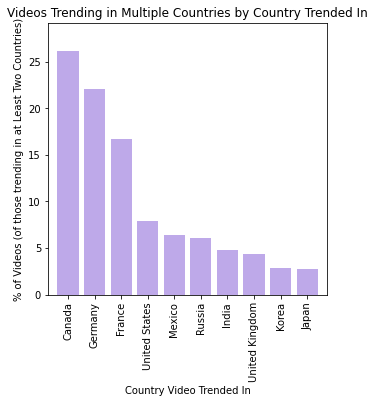

In [59]:
#display the findings for where videos, that trended in multiple countries, trend

#prep labels

labels2 = ["Canada", 
           "Germany",
           "France",
           "United States",
           "Mexico",
           "Russia",
           "India",
           "United Kingdom",
            "Korea",
            "Japan"]

#setup axis
x = np.arange(len(labels2))
y= First_day_trended_by_country["country"].value_counts()*100/First_day_trended_by_country["country"].count()

#plot
plt.figure(figsize=(5,5))

ax3 = plt.bar(x, 
        y, 
        color='mediumpurple', 
        alpha=0.6, 
        align="center")

#formatting
tick_locations = [value for value in x]

plt.xticks(tick_locations, labels2, rotation=90)

plt.xlim(-0.75, len(x)-0.25)

plt.ylim(0, max(y)+3)

plt.title("Videos Trending in Multiple Countries by Country Trended In")
plt.xlabel("Country Video Trended In")
plt.ylabel("% of Videos (of those trending in at Least Two Countries)")

plt.show()

Approach: create a dataframe only containing videos that trended in 2+ countries. Remove duplicates such as there was only 1 row per video_id per country, and count the number of videos per country.  

Analysis: Videos that trended in multiple countries most often trended in Canada (over 1 in 4) followed by Germany (over 1 in 5) and France (just under 1 in 6). Few Videos that trended in multiple countries trend in the US, suggesting it has less impact on trending in other countries. 

<Figure size 432x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x21fc5db3a90>,
 [Text(1.0909909692766604, -0.14049450151793577, ''),
  Text(-1.0909909626996368, 0.14049455259090943, '')],
 [Text(0.5950859832418147, -0.07663336446432858, '79.3%'),
  Text(-0.5950859796543473, 0.07663339232231423, '20.7%')])

Text(0.5, 1.0, 'Whether videos that trended in multiple countries\n first did so on the same day or different days')

(-1.1210415675365222,
 1.1063316639807232,
 -1.105837706058478,
 1.105119121212891)

<function matplotlib.pyplot.show(*args, **kw)>

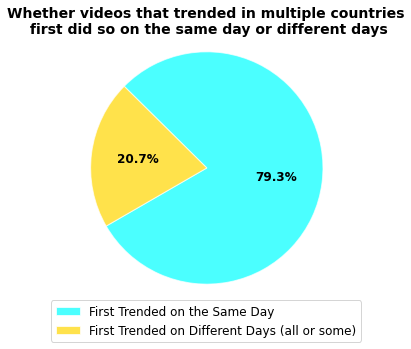

In [104]:
#display the findings for segmentation: number of countries trended in 

plt.figure(figsize=(6,5))

    #stratify dataset
same_day = Final_First_dates_counts_by_id.loc[Final_First_dates_counts_by_id["no of unique first trend dates"]==1, :]
multiple_days = Final_First_dates_counts_by_id.loc[Final_First_dates_counts_by_id["no of unique first trend dates"]>1, :]

    #visualize
# Labels for the sections of our pie chart
labels = ["First Trended on the Same Day", "First Trended on Different Days (all or some)"]

# The values of each section of the pie chart

sizes = [len(same_day)/Final_First_dates_counts_by_id["video_id"].count(), 
         len(multiple_days)/Final_First_dates_counts_by_id["video_id"].count()]

# The colors of each section of the pie chart
#colors = [plt.cm.Blues(0.4), plt.cm.Purples(0.4), plt.cm.Greens(0.4)]
colors = ["cyan", "gold"]

#Display
plt.pie(sizes, colors=colors, autopct="%1.1f%%",
        shadow=False, startangle=210, 
        wedgeprops={'edgecolor':'w', "alpha" : 0.7}, 
        textprops={"fontsize": 12, "color":'black', "fontweight":'bold'})

#formatting
plt.title("Whether videos that trended in multiple countries\n first did so on the same day or different days", fontsize=14, fontweight='bold')
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.2), fontsize=12)
plt.tight_layout()
plt.axis("equal")

plt.show
plt.show()

Approach: create a dataframe only containing videos that trended in 2+ countries. Determine first day of trending per video per country, and put in lists per video_id containing only unique dates. Count the lengths of lists to determine no. of unique first days.

Insights: Just under 8 in 10 videos that trended in multple countries first did so on same day across countries. This suggests that there is no single regional origin of trending for the majority of videos that trend in multiple countries. 

Analysis: 
---

Where do video originate from? 

In [138]:
#Replace NaN with string to capture channels with unknown origins in the total

ultimate_df["Country Origin"].fillna("Unknown", inplace=True)

#find top 10 origins of channels

Channel_origins = ultimate_df["Country Origin"].value_counts().head(11).reset_index()

counts= Channel_origins["Country Origin"].tolist()

counts

[155243, 61247, 24554, 18089, 17748, 15026, 14470, 10708, 7087, 5294, 4255]

<Figure size 360x360 with 0 Axes>

([<matplotlib.axis.XTick at 0x21fd166ae20>,
 [Text(0, 0, 'Unknown'),
  Text(0, 0, 'United States'),
  Text(0, 0, 'India'),
  Text(0, 0, 'Russia'),
  Text(0, 0, 'France'),
  Text(0, 0, 'Germany'),
  Text(0, 0, 'Mexico'),
  Text(0, 0, 'Korea'),
  Text(0, 0, 'United Kingdom'),
  Text(0, 0, 'Japan'),
  Text(0, 0, 'Canada')])

(-0.75, 10.75)

(0.0, 160243.0)

Text(0.5, 1.0, 'Origin of Channels')

Text(0.5, 0, 'Country (Top 10)')

Text(0, 0.5, 'No. of Channels')

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

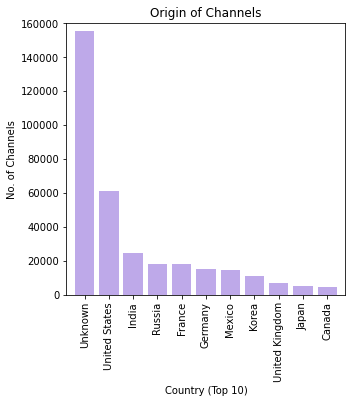

In [153]:
#display the findings for where videos, that trended in multiple countries, trend

#prep labels

labels3 = ["Unknown", 
           "United States",
           "India",
           "Russia",
           "France",
           "Germany",
           "Mexico",
           "Korea",
           "United Kingdom",
           "Japan",
           "Canada"]
       
#setup axis
x = np.arange(len(labels3))

#plot
plt.figure(figsize=(5,5))

ax3 = plt.bar(x, 
        counts, 
        color='mediumpurple', 
        alpha=0.6, 
        align="center")

#formatting
tick_locations = [value for value in x]

plt.xticks(tick_locations, labels3, rotation=90)

plt.xlim(-0.75, len(x)-0.25)

plt.ylim(0, max(y)+5000)

plt.title("Origin of Channels")
plt.xlabel("Country (Top 10)")
plt.ylabel("No. of Channels")

plt.show()

Approach: counted the no. of channels by origin and selected the top ten countries of origin. 

Insights: Most video have an unknown origin. Of those that do, the highest proportion originate from the US.  

Text(0.5, 1.0, 'Variation in Origin of Videos Watched in Each Country')

Text(0.5, 0, 'Country of Viewing')

Text(0, 0.5, 'No. of Origin Countries')

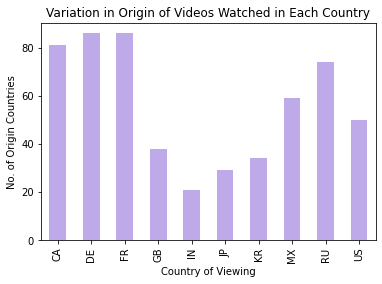

In [160]:
#country of origin counts

#create a dataframe with one row per video per country
one_per_video = ultimate_df.drop_duplicates(
    subset=["video_id", "country"], keep="first")

origin_counts_by_country_watched = one_per_video.groupby("country")["Country Origin"].value_counts().unstack()


#origin_counts_by_country_watched_unstacked= origin_counts_by_country_watched.unstack()

ax4 = origin_counts_by_country_watched.count(axis=1).plot(kind="bar",        
                                                          color='mediumpurple', 
                                                          alpha=0.6)

ax4.set_title("Variation in Origin of Videos Watched in Each Country")
ax4.set_xlabel("Country of Viewing")
ax4.set_ylabel("No. of Origin Countries")

Approach: Create a dataframe with 1 row per video_id pre country. Count the number of channel origins by country.   

Insights: Canada, Germany and France watch videos originating from over 80 known countries.  

In [166]:
#create dataframe containing breakdown of origin by country viewed

source_focused = pd.DataFrame({
                              "CA (%)" : origin_counts_by_country_watched["CA"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "DE (%)" : origin_counts_by_country_watched["DE"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "FR (%)" : origin_counts_by_country_watched["FR"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "GB (%)" : origin_counts_by_country_watched["GB"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "IN (%)" : origin_counts_by_country_watched["IN"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "JP (%)" : origin_counts_by_country_watched["JP"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "KR (%)" : origin_counts_by_country_watched["KR"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "MX (%)" : origin_counts_by_country_watched["MX"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "RU (%)" : origin_counts_by_country_watched["RU"]*100/origin_counts_by_country_watched.sum(axis=1),
                              "US (%)" : origin_counts_by_country_watched["US"]*100/origin_counts_by_country_watched.sum(axis=1)})
                              #"Unknown (%)" : origin_counts_by_country_watched["Unknown"]*100/origin_counts_by_country_watched.sum(axis=1)})

source_focused.fillna(value=0, inplace=True)

#source_focused.drop(columns=["Total Sources"], inplace=True) 

source_focused

,CA (%),DE (%),FR (%),GB (%),IN (%),JP (%),KR (%),MX (%),RU (%),US (%)
country,,,,,,,,,,
CA,5.236417,0.143407,2.351881,2.679669,4.916824,0.094239,0.700647,0.020487,0.249939,33.876916
DE,0.401851,33.799345,0.097930,1.246074,1.337251,0.023638,0.104684,0.000000,1.874177,8.178840
FR,0.759187,0.193069,37.929906,0.769004,1.852155,0.094898,0.193069,0.003272,0.055630,4.211525
GB,1.285977,0.275566,0.183711,10.287814,0.061237,0.459277,1.469688,0.000000,0.030618,36.037967
IN,0.251503,0.055208,0.055208,0.153355,63.777451,0.000000,0.000000,0.000000,0.006134,3.600785
JP,0.046508,0.023254,0.062011,0.139524,0.077513,32.237811,1.054182,0.000000,0.000000,1.635532
KR,0.100915,0.044150,0.000000,0.151372,0.132450,0.170293,40.182908,0.000000,0.018921,1.570482
MX,0.322465,0.032844,0.020901,0.229906,0.077630,0.226920,0.161233,26.439150,0.110474,8.613997
RU,0.195518,0.341426,0.087545,0.221781,0.148827,0.137154,0.087545,0.000000,41.604412,4.231353


<Figure size 720x720 with 0 Axes>

([<matplotlib.axis.XTick at 0x21fd1eb8430>,
 [Text(0, 1, 'CA (%)'),
  Text(0, 1, 'DE (%)'),
  Text(0, 1, 'FR (%)'),
  Text(0, 1, 'GB (%)'),
  Text(0, 1, 'IN (%)'),
  Text(0, 1, 'JP (%)'),
  Text(0, 1, 'KR (%)'),
  Text(0, 1, 'MX (%)'),
  Text(0, 1, 'RU (%)'),
  Text(0, 1, 'US (%)')])

([<matplotlib.axis.YTick at 0x21fd1eb8ca0>,
 [Text(0, 0, 'CA (%)'),
  Text(0, 0, 'DE (%)'),
  Text(0, 0, 'FR (%)'),
  Text(0, 0, 'GB (%)'),
  Text(0, 0, 'IN (%)'),
  Text(0, 0, 'JP (%)'),
  Text(0, 0, 'KR (%)'),
  Text(0, 0, 'MX (%)'),
  Text(0, 0, 'RU (%)'),
  Text(0, 0, 'US (%)')])

Text(0, 0.5, 'Country of Viewers')

Text(0.5, 0, 'Country of Creators')

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x720 with 0 Axes>

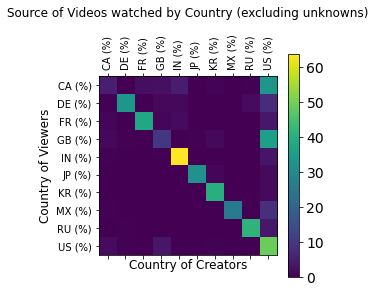

In [182]:
plt.figure(figsize=(10, 10))
plt.matshow(source_focused, )
plt.xticks(range(source_focused.shape[1]), source_focused.columns, fontsize=10, rotation=90)
plt.yticks(range(source_focused.shape[1]), source_focused.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

ttl = plt.title('Source of Videos watched by Country (excluding unknowns)', fontsize=12)
ttl.set_position([0.5, 1.3])

plt.ylabel("Country of Viewers", fontsize=12)
plt.xlabel("Country of Creators", fontsize=12)
plt.show

Approach: convert count of number of channel country origins by country into percentages.   

Insights: Canada and the UK watched little content known to originate from within the respective countries, rather most videos watched in these countries orignate in the US. Comparatively, most videos watched in other countries originate from within the respective countries.     

other analysis
---

In [ ]:
#explore the distribution of days_trended by number_of_countries_trended_in
plt.scatter(combined_per_video_df["No of Countries Trended In"],
            combined_per_video_df["Mean Days Trending"])
plt.xlabel("No of Countries Video Trended In")
plt.ylabel("Means days Video Trended")
plt.show()

In [ ]:
# histogram plot no. of countries trended in vs. days trending 

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=False, figsize=(10,8))

DaysTrended_vs_Countries = yup.hist(column="Days_trending", 
              by="No. countries trended in", 
              bins = 10, 
              grid=False,
              #figsize=(20,5),
              #layout=(10,5),
              zorder=2, rwidth=0.9,
              color='#86bf91', 
              xlabelsize =12, 
              xrot = 0,
              ax=axes)
    
# set title and axis labels
plt.suptitle('Distribution of Days Trending (over 4 days) by no of Countries Trended In', 
             x=0.5, y=1, ha='center', fontsize=12)
fig.text(0.5, 0.04, 'Days Trending', ha='center')
fig.text(0.04, 0.5, 'No. of Videos that Trended More than 4 Days', va='center', rotation='vertical')

In [ ]:
#ultimately - delete this/ just verifying stacked bar chart was the right approach

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier_formatting = dict(markeredgecolor='r', marker='x')

box_plot = combined_per_video_df.boxplot(
                                by = "Country Segment", 
                                column =["Mean Days Trending"],
                                grid=False,
                                figsize=(8, 5), 
                                fontsize=10, 
                                color="black",
                                showmeans=True,
                                flierprops=outlier_formatting)

#formatting
box_plot.set_title("No. of Countries vs. Number of Days", fontsize=14)

box_plot.set_ylabel(
    "The number of Days Video trended for", 
    fontsize=12,
    fontweight ='bold')

box_plot.set_xlabel(
    "Number of Countries Video Trended In", 
    fontsize=12,
    fontweight ='bold')

plt.suptitle('')

#display
plt.tight_layout()
plt.show()

In [ ]:
#Plot 

Total_API_DF.groupby("Country Segment")["views"].mean().plot(kind="bar")

In [ ]:
Total_API_DF["Days Trended Segment"] = combined_per_video_df["Days Trended Segment"]

In [ ]:
Total_API_DF.groupby("Days Trended Segment")["views"].mean().plot(kind="bar")

In [ ]:
#Total_API_DF.reset_index(inplace=True)
Total_API_DF.groupby("Days Trended Segment")["video_id"].nunique()

In [ ]:
Total_API_DF.groupby("Days Trended Segment")["views"].count()

In [ ]:
Test = Trending_Days.reset_index(level=1)


In [ ]:
mean_views =Total_API_DF.groupby(["video_id","country"])["views"].mean()

In [ ]:
mean_views.reset_index(level=1)

In [ ]:
merge_views_day = pd.merge(Test, mean_views, on=["video_id", "country"], how="left")

In [ ]:
merge_views_day

In [ ]:
plt.scatter(x=merge_views_day["Days_trending"],y=merge_views_day["views"])

In [ ]:
merge_views_day["views"].describe()

In [ ]:
sub = merge_views_day.loc[merge_views_day["views"]>2.896142e+05, :]

In [ ]:
plt.scatter(x=sub["Days_trending"],y=sub["views"])

In [ ]:
x_values = merge_views_day["Days_trending"]
y_values = merge_views_day["views"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()
print(rvalue**2)

In [ ]:
# histogram plot no. of countries trended in vs. days trending 

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(5,5))

views_countries = merge_views_day.hist(column="views", 
              by="Country Segment", 
              bins = 10, 
              grid=False,
              #figsize=(20,5),
              #layout=(10,5),
              zorder=2, rwidth=0.9,
              color='#86bf91', 
              xlabelsize =12, 
              xrot = 0,
              ax=axes)
    
# set title and axis labels
plt.suptitle('Distribution of Days Trending (over 4 days) by no of Countries Trended In', 
             x=0.5, y=1, ha='center', fontsize=12)
fig.text(0.5, 0.04, 'Days Trending', ha='center')
fig.text(-0.1, 0.5, 'No. of Videos that Trended More than 4 Days', va='center', rotation='vertical')

In [ ]:
merge_views_day["Country Segment"] = combined_per_video_df["Days Trended Segment"]

In [ ]:
First_trend = multinational_df.groupby(
    ['video_id',"country"]).aggregate(
    First_Trend_Date=('trending_date', 'min'))
   

In [68]:
test = Total_DF

In [70]:
test.set_index("video_id", inplace=True)

In [84]:
test["Country Segment"] = combined_per_video_df["Country Segment"]

xx = test.loc[test["Country Segment"]!="Trended in 1 country", :]

x= xx.groupby(['video_id',"country"]).aggregate(
    First_Trend_Date=('trending_date', 'min'))

In [85]:
x.reset_index(level=1, inplace=True)

In [83]:
x["country"].value_counts()

RU    34268
MX    33492
FR    30559
DE    29613
CA    24406
IN    16302
KR    15855
JP    12901
US     6346
GB     3266
Name: country, dtype: int64

In [86]:
x["country"].value_counts()

CA    9567
DE    8082
FR    6110
US    2887
MX    2340
RU    2230
IN    1729
GB    1573
KR    1032
JP    1001
Name: country, dtype: int64